In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('talk')
sns.set_style("whitegrid")

# Z-Transform

One important mathematical concept for understanding and designing filters is the *Z-transform*.
[Linear time-variant filters (LTI)](def-linear-time-invariant) in the form of infinite (IIR) and finite impulse response (FIR) filters described by difference equations play an important role in signal processing, i.e., sound design and these filters can be analysed using the *Z-transform*.

The *Z-transform* converts a discrete-time signal, which is a sequence of real or complex numbers, into a complex frequency-domain ($z$-domain or $z$-plane) representation.
It can be considered as a discrete-time equivalent of the Laplace transform.
The *Z-transform* is an generalization of the *discrete-time Fourier transform (DTFT)* (not to be confused with the discrete Fourier transform).

````{admonition} (Unilateral) Z-Transform
:name: def-fourier-transform-exp
:class: definition

Let $x[n]$ be a discrete-time signal, then the (unilateral) *Z-transform* of $x[n]$ is the formal power series

$$X(z) = \mathcal{Z}\{x[n]\} = \sum\limits_{n=0}^\infty x[n] z^{-n},$$

where $n \in \mathbb{N}_0$ and $z \in \mathbb{C}$ is, in general, a [complex number](sec-complex-numbers).

````

$X(z)$ is a complex-valued function of complex-valued $z$.
Furthermore, $X(z)$ is defined on the $z$-plane while the DTFT is defined only on the unit circle, i.e, for $|z| = 1$ that is $z = e^{i \omega}$.
Remeber, as $-\pi < \omega < \pi$, $z = e^{i \omega}$ goes once around the unit circle.

## Region of Convergence

The region of convergence is the set of $z$ for which the Z-transform of a signal $x[n]$ converges.
If it does not converge, the Z-transform does not exist.
For example,

$$\mathcal{Z}\{\delta[n-n_0]\} = \sum\limits_{n=0}^\infty \delta[n-n_0] z^{-n} = z^{-n_0}$$

which does not converge for $z = 0$ (note $n_0 \geq 0$).

Let us look at another example, i.e., the signal

$$x[n] = \alpha^n \cdot u[n] = \alpha^n \cdot 1 = \alpha^n.$$

In this case 

\begin{equation}
\begin{split}
X(z) &= \sum\limits_{n = 0}^\infty x[n] z^{-n}
= \sum\limits_{n = 0}^\infty \alpha^n z^{-n}\\
&= \sum\limits_{n = 0}^\infty (\alpha z^{-1})^n
\end{split}
\end{equation}

This gives us

$$\frac{1}{1-\alpha z^{-1}}$$

if $|\alpha z^{-1}| < 1$, otherwise $X(z)$ does not converge.

The *region of convergence ROC* is either the region 

1. inside a circle ($|z| < r_L$), 
2. outside a circle ($|z| > r_R$) or 
3. a ring ($r_R < |z| < r_L$).

Secondly, the ROC can not contain any *poles*.
The ROC includes $|z| = 1$ if and only if the *discrete-time Fourier transform (DTFT)* exists.
Furthermore, if $x[n]$ is finite duration signal (which is the case in digital audio processing) then the ROC contains all $z$ except possibly $z=0$ and $z = \infty$.

## Poles and Zeros

Most useful and important Z-transforms are those who give us rational functions

$$X(z) = \frac{P(z)}{Q(z)}$$

with $P(z), Q(z)$ to be polynomials in $z$.

The *zeros* are values of $z$ for which $X(z) = 0$ and the *poles* are values of $z$ for which $X(z) = \infty$.
The rooits of $P(z)$ are the *zeros* and the roots of $Q(z)$ are the *poles*.
($X(z)$ may also have poles/zeros at $z = \infty$ if the order of the two polynomials differ.)

Let us look at the example above, i.e.

$$\mathcal{Z}\{\alpha^n u[n]\} = X(z) = \frac{z}{z-\alpha}, \quad |z| > |\alpha|.$$

In this case there is a *pole* at $z = \alpha$ and a *zero* at $z = 0$.
The following plot shows *zeros* in blue and *poles* in orange.
The *region of convergence (ROC)* (in blue) is outside of the (red) circle of radius $\alpha$.

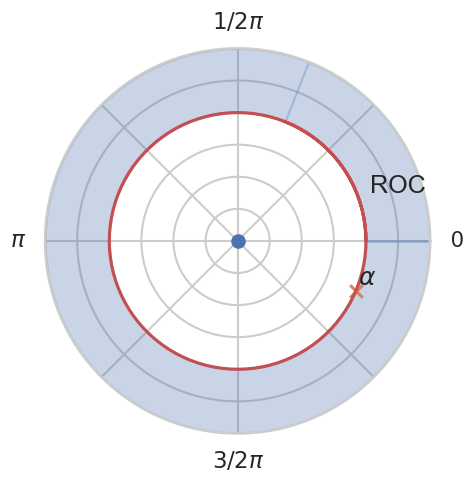

In [2]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 1, np.ones(len(r))*1.5, color='b', alpha = 0.3)
ax.plot(2*np.pi*r, np.ones(len(r)), color='r')

ax.scatter([0], [0], marker='o')
ax.scatter([2*np.pi-0.4], [1], marker='x')


ax.set_rmax(1.5)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])  # Less radial ticks
ax.set_yticklabels([r'', '', '', '', r'', '', ''])  # Less radial ticks
ax.text(-0.35,1,r'$\alpha$')
ax.text(0.35,1.1,r'ROC')
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True);

Let us look at another example:

$$\mathcal{Z}\left\{ \left( \frac{1}{4} \right) u[n] + \left( \frac{-1}{2}\right)^n u[n]\right\} = X(z) = \frac{z}{z-1/4} + \frac{z}{z + 1/}, \quad |z| > 1/2$$

Using some algebra, we get

$$X(z) = \frac{z^2 + 1/2 z + z^2 - 1/4 z}{(z-1/4)(z+1/2)} = \frac{2z(z+1/8)}{(z-1/4)(z+1/2)}, \quad |z| > 1/2$$

All *zeros* ($z = 0$, $z = -1/8$) and *poles* ($z = 1/4$, $z = -1/2$) are on the real-axis.

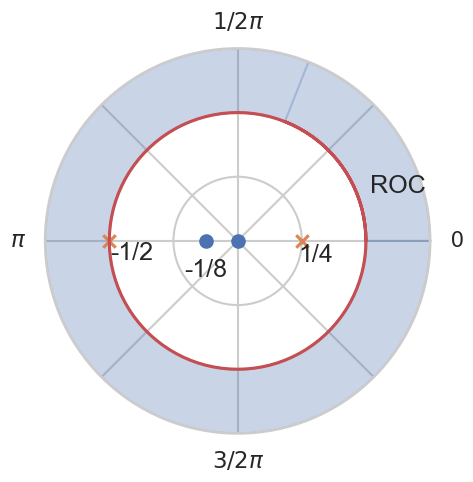

In [3]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 1/2, np.ones(len(r)), color='b', alpha = 0.3)
ax.plot(2*np.pi*r, np.ones(len(r))*0.5, color='r')

ax.scatter([0,np.pi], [0,1/8], marker='o')
ax.scatter([0,np.pi], [1/4,1/2], marker='x')

ax.set_rmax(0.75)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks(np.array([0, 0.25, 0.5, 0.75]))  # Less radial ticks
ax.set_yticklabels([r'', '', '', ''])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.text(np.pi+0.6,1/8*2,r'-1/8')
ax.text(np.pi+0.15,1/2,r'-1/2')
ax.text(-0.15*2.2,1/4,r'1/4')
ax.text(0.35,0.55,r'ROC')
ax.grid(True);

Let us look at another example were 

$$
x[n] = \begin{cases}
    \alpha^n, & \text{ if } 0 \leq n \leq N-1\\
    0, & \text{ otherwise}. 
\end{cases} 
$$

Then,

$$X(z) = \sum\limits_{n=0}^{N-1} (\alpha z^{-1})^n.$$

This is a *geometric series* thus

$$X(z) = \frac{1 - (\alpha z^{-1})^N}{1 - \alpha z ^{-1}} = \frac{z^N- \alpha^N}{z^{N-1}(z-\alpha)}.$$

This geometric series converges for $|\alpha| < \infty$ and $z \neq 0$.
Therefore, the *ROC* is the entire $z$-plane, except $z = 0$.
Our single *pole* is at $z = 0$ since $z = \alpha$ cancels out with our *zero* $z_0 = \alpha$.

Remeber that when we multiply a [complex number](sec-complex-numbers) by another complex number, the result is another complex number that is a rotated and scaled version of the first one.
The equation $z^N = \alpha^N$ should have $N$ solutions.
[De Moivre's theorem](theorem-de-moivre) states that for $z = r \cdot e^{i \phi}$

$$z^N = r^N \cdot \underbrace{e^{i \cdot n \cdot \phi}}_{\text{rotation}}.$$

If we set $r = \alpha$ we get

$$z^N = r^N \cdot e^{i \cdot N \cdot \phi} = \alpha^N \cdot e^{i \cdot N \cdot \phi} = \alpha^N.$$

Note that $|e^{i \cdot N \cdot \phi}| = 1$.
So we search angles $\phi_k$ such that rotating $\alpha^N$ $n$-times with angle $\phi_k$ gives us $\alpha^N$.
If we rotate by 360 degrees, i.e. $2\pi$ we clearly land on $\alpha^N$!
Therefore,

$$\phi_k = \frac{2\pi}{N} \cdot k, \quad k = 1, 2, 3, \ldots, N-1.$$

This our *ploes* are

$$z_k = \alpha \cdot e^{i \frac{2\pi}{N} k}, \quad k = 1, 2, 3, \ldots, N-1.$$

The following plot shows *poles* and *zeros* for some $\alpha \in \mathbb{R}^+$.

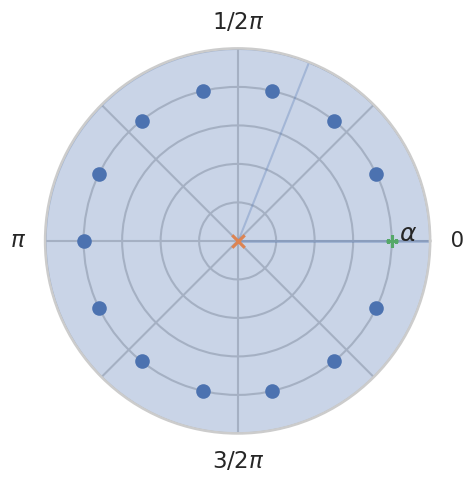

In [4]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 0, np.ones(len(r))*1.25, color='b', alpha = 0.3)

ax.scatter(np.linspace(0, 2*np.pi, 15)[1:-1:], np.ones(15)[1:-1:], marker='o')

ax.scatter([0], [0], marker='x')

ax.scatter([0], [1.0], marker='+')

ax.set_rmax(1.25)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks(np.array([0, 0.25, 0.5, 0.75, 1.0, 1.25]))  # Less radial ticks
ax.set_yticklabels([r'', '', '', '', '', ''])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.text(0,1.05,r'$\alpha$')
ax.grid(True);

If $X(z) = \frac{P(z)}{Q(z)}$ and the order of $P(z)$ is $M$ while the order of $Q(z)$ is $N$ then:

1. $N > M \Rightarrow N-M$ zeros at $z = \infty$
2. $M > N \Rightarrow M-N$ poles at $z = \infty$.

## Power Series Expansion

To find the solution to the Z-transform one might try the *power series expansion* since the Z-transform

$$X(z) = \sum\limits_{n=0}^\infty x[n] z^{-n}$$

is itself a power series.
Therefore, what we have to do is, to identify $x[n]$ as coefficient of $z^{-n}$.
For example, given

$$X(z) = 1 + 3z^{-1} - 4z^{-4}$$

we can write this like

$$X(z) =  = x[0] z^0 + x[1] z^{-1} - x[4] z^{-4},$$

thus

$$x[n] = \delta[n] + 3 \delta[n-1] - 4 \delta[n-4]$$

where $\delta$ is the [Kronecker $\delta$-function](def-kronecker-delta).

We can also invert rational $X(z)$ with *long division*.
Let us assume

$$X(z) = \frac{1-z^{-1}}{1-1/2 z^{-1}}$$

is given.
For the ROC $|z| > 1/2$ has to hold.

Now we can just compute $(1-z^{-1}) / (1-1/2 z^{-1})$ which gives us

$$1 - 1/2 z^{-1} - 1/4 z^{-2} - 1/8 z^{-3} - 1/16 z ^{-4} - \ldots$$

thus

$$x[n] = 2\delta[0] -\left( \frac{1}{2} \right)^n u[n].$$

## Partial Fraction Expansion

TODO

## Properties of the Z-Transform

TODO

## LTI Analysis

The general form for a difference equation is given by 

\begin{equation}
\sum\limits_{k=0}^N a_k y[n-k] = \sum\limits_{k=0}^M b_k x[n-k], \quad a_0 \neq 0
\end{equation}

### General Transformation

If we take the Z-transform of both sides we get:

\begin{equation*}
\sum\limits_{k=0}^N a_k z^{-k}Y(z) = \sum\limits_{k=0}^M b_k z^{-k} X(z)
\end{equation*}

and by solving for $Y(z)$ we get

\begin{equation*}
Y(z) = \underbrace{\frac{\sum\limits_{k=0}^M b_k z^{-k}}{\sum\limits_{k=0}^N a_k z^{-k}}}_{H(z)} X(z) = H(z) X(z)
\end{equation*}

where $H(z)$ is the *transfer function*, i.e. the Z-transform of the filter's [frequency response](def-frequency-response), in other words 

$$H(z) = \mathcal{Z}\{h[n]\}.$$

If $b_0 \neq 0$ then

\begin{equation}
H(z) = \frac{b_0}{a_0} \frac{\prod\limits_{k=1}^M (1 - c_k z^{-1})}{\prod\limits_{k=1}^N (1 - d_k z^{-1})}
\end{equation}

where $c_k, k = 1, 2, \ldots M$ are zeros and $d_k, k = 1, 2, \ldots N$ are poles.

### Example

Let 

$$H(z) = \frac{(z+1)^2}{(z-1/2)(z+1/4)} = \frac{z^2(1 + z^{-1})^2}{z^2(1-1/2 z^{-1}) (1+1/4 z^{-1})} = \frac{1 + 2 z^{-1} + z^{-2}}{ 1 - 1/4 z^{-1} - 1/8 z^{-2}}$$

Then $b_0 = 1$, $b_1 = 2$, $b_2 = 1$ and $a_0 = 1$, $a_1 = -1/4$, $a_2 = -1/8$ and we get the following equation:

$$y[n] - 1/4 \cdot y[n-1] - 1/8 \cdot y[n-2] = x[n] + 2 \cdot x[n-1] + x[n-2]$$

Thus the *filter* is defined by

$$y[n] = x[n] + 2 \cdot x[n-1] + x[n-2] - 1/4 \cdot y[n-1] - 1/8 \cdot y[n-2].$$

### Stability and Causality

TODO

### Inverse System

TODO

### Minimum Phase and All Pass Filters

TODO

### Frequency Response and Poles and Zeros

TODO

### Impulse Response and Poles and Zeros

TODO